In [1]:
from numpy import random
import math
import time
import matplotlib.pylab as plt

# Define individual sorting algorithms

In [2]:
# INSERTION SORT - w/ counting of no. of comparisons
def insertion_count(data):
    comparisons = 0

    for i in range(1,len(data)):
        curr = data[i]
        pos = i
        while pos > 0 and data[pos-1] > curr:
            comparisons += 1                    # compare data[pos-1] and curr
            data[pos] = data[pos-1]
            pos -= 1
        if data[pos-1] <= curr:                 # while loop stopped because of 2nd criteria
            comparisons += 1                    # comparison still made whether success/fail, so must add 1
        data[pos] = curr
    return data, comparisons

In [3]:
# MERGE SORT - w/ counting of no. of comparisons
def merge(sorted1,sorted2):
    list1 = sorted1[0]
    list2 = sorted2[0]
    i = j = 0
    newlist = []
    comparisons = sorted1[1]+sorted2[1]
    
    while i < len(list1) and j < len(list2):
        if list1[i] < list2[j]:
            comparisons += 1
            newlist.append(list1[i])
            i += 1
        else:
            comparisons += 1
            newlist.append(list2[j])
            j += 1

    if i < len(list1):
        newlist.extend(list1[i:])
    else:
        newlist.extend(list2[j:])

    return newlist, comparisons
    
def merge_sort(data):
    # Base Case
    if len(data) == 1:
        return data,0
    # Recursion
    elif len(data) > 1:
        mid = len(data)//2
        lower = data[:mid]
        upper = data[mid:]
        sorted1 = merge_sort(lower) #sorted 1 is a tuple (sorted lower list, number of comparisons for lower list)
        sorted2 = merge_sort(upper) #sorted 2 is a tuple (sorted upper list, number of comparisons for upper list)
        return merge(sorted1, sorted2)

In [4]:
def test(x, size):
    data = random.randint(low=1, high=x, size=size)
    start_time = time.time()
    _, insertion_comparisons = insertion_count(data)
    insertion_time = time.time() - start_time
    start_time = time.time()
    _, merge_comparisons = merge_sort(data)
    merge_time = time.time() - start_time
    return insertion_comparisons, insertion_time, merge_comparisons, merge_time

Due to fluctuations caused by randomness of dataset, we should conduct multiple tests and obtain the average.

Text(0, 0.5, 'Time')

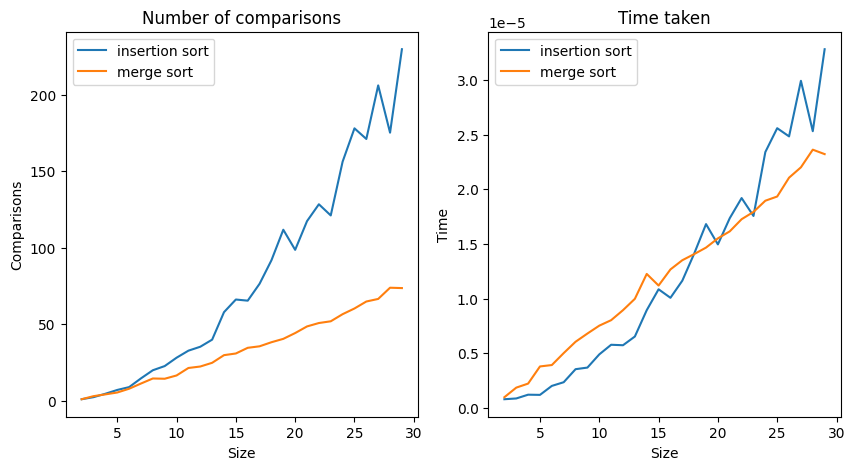

In [5]:
sizes = [i for i in range(2, 30)]
insertion_comparison_array = []
insertion_time_array = []
merge_comparison_array = []
merge_time_array = []

for iteration in range(100000):
    for i in range(len(sizes)):
        size = sizes[i]
        insertion_comparisons, insertion_time, merge_comparisons, merge_time = test(size, size)
        if (iteration == 0):
            insertion_comparison_array.append(insertion_comparisons)
            insertion_time_array.append(insertion_time)
            merge_comparison_array.append(merge_comparisons)
            merge_time_array.append(merge_time)
        else:
            insertion_comparison_array[i] = (insertion_comparison_array[i] + insertion_comparisons) / 2
            insertion_time_array[i] = (insertion_time_array[i] + insertion_time) / 2
            merge_comparison_array[i] = (merge_comparison_array[i] + merge_comparisons) / 2
            merge_time_array[i] = (merge_time_array[i] + merge_time) / 2

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].plot(sizes, insertion_comparison_array, label = "insertion sort")
axs[0].plot(sizes, merge_comparison_array, label = "merge sort")
axs[0].legend()
axs[0].set_title("Number of comparisons")
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Comparisons")
axs[1].plot(sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(sizes, merge_time_array, label = "merge sort")
axs[1].legend()
axs[1].set_title("Time taken")
axs[1].set_xlabel("Size")
axs[1].set_ylabel("Time")

# Implementation of hybrid sorting algorithm

In [6]:
def hybrid_sort(data, S):
    # Base Case
    if len(data) == 1:
        return data,0
    # Recursion
    elif len(data) > 1:
        mid = len(data)//2
        lower = data[:mid]
        upper = data[mid:]
        if (len(lower) < S):
            sorted1 = insertion_count(lower)
        else:
            sorted1 = hybrid_sort(lower, S) #sorted 1 is a tuple (sorted lower list, number of comparisons for lower list)
        if (len(upper) < S):
            sorted2 = insertion_count(upper)
        else:
            sorted2 = hybrid_sort(upper, S) #sorted 2 is a tuple (sorted upper list, number of comparisons for upper list)
        return merge(sorted1, sorted2)

In [7]:
def test_hybrid(S, size):
    data = random.randint(low=1, high=size, size=size)
    start_time = time.time()
    _, hybrid_comparisons = hybrid_sort(data, S)
    hybrid_time = time.time() - start_time
    return hybrid_comparisons, hybrid_time

# Fixed S = 20, varying list size

Size: 1000
Number of comparisons: 10272
Time taken: 0.0013570785522460938

Size: 10000
Number of comparisons: 134527
Time taken: 0.017168283462524414

Size: 100000
Number of comparisons: 1643060
Time taken: 0.18198895454406738

Size: 1000000
Number of comparisons: 20248780
Time taken: 2.1414220333099365

Size: 10000000
Number of comparisons: 241262143
Time taken: 25.825935125350952



Text(0.5, 1.0, 'Time taken')

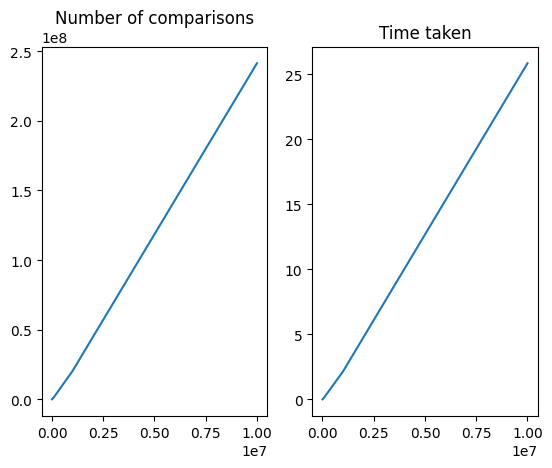

In [8]:
fixed_S = 20

hybrid_sizes = [int(1000 * math.pow(10, i)) for i in range(5)]
hybrid1_comparison_array = []
hybrid1_time_array = []
for size in hybrid_sizes:
    hybrid1_comparisons, hybrid1_time = test_hybrid(fixed_S, size)
    hybrid1_comparison_array.append(hybrid1_comparisons)
    hybrid1_time_array.append(hybrid1_time)
    print(f"Size: {size}")
    print(f"Number of comparisons: {hybrid1_comparisons}")
    print(f"Time taken: {hybrid1_time}\n")

fig, axs = plt.subplots(1, 2)
axs[0].plot(hybrid_sizes, hybrid1_comparison_array)
axs[0].set_title("Number of comparisons")
axs[1].plot(hybrid_sizes, hybrid1_time_array)
axs[1].set_title("Time taken")

# Fixed list size = 100000, varying S

S: 1
Number of comparisons: 1536442
Time taken: 0.2015540599822998

S: 2
Number of comparisons: 1536239
Time taken: 0.19133615493774414

S: 3
Number of comparisons: 1536742
Time taken: 0.17723989486694336

S: 4
Number of comparisons: 1541298
Time taken: 0.1711258888244629

S: 5
Number of comparisons: 1542666
Time taken: 0.16901183128356934

S: 6
Number of comparisons: 1542457
Time taken: 0.1693260669708252

S: 7
Number of comparisons: 1560105
Time taken: 0.16829800605773926

S: 8
Number of comparisons: 1563611
Time taken: 0.1632709503173828

S: 9
Number of comparisons: 1563063
Time taken: 0.1638650894165039

S: 10
Number of comparisons: 1563895
Time taken: 0.1631319522857666

S: 11
Number of comparisons: 1563274
Time taken: 0.16453814506530762

S: 12
Number of comparisons: 1563673
Time taken: 0.16267704963684082

S: 13
Number of comparisons: 1623217
Time taken: 0.1723039150238037

S: 14
Number of comparisons: 1643272
Time taken: 0.17463898658752441

S: 15
Number of comparisons: 1643564

Text(0.5, 1.0, 'Time taken')

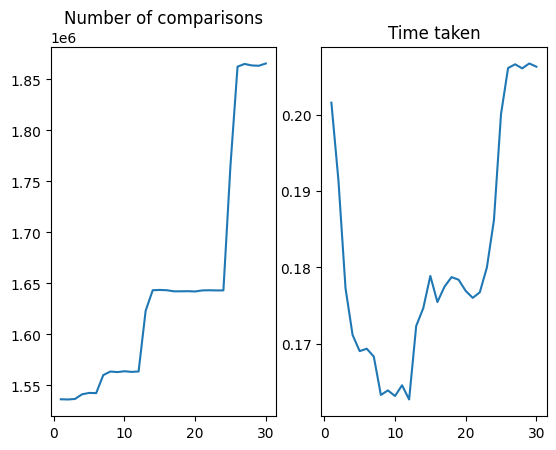

In [8]:
fixed_size = 100000

S_array = [1 + i for i in range(30)]
hybrid2_comparison_array = []
hybrid2_time_array = []
for S in S_array:
    hybrid2_comparisons, hybrid2_time = test_hybrid(S, fixed_size)
    hybrid2_comparison_array.append(hybrid2_comparisons)
    hybrid2_time_array.append(hybrid2_time)
    print(f"S: {S}")
    print(f"Number of comparisons: {hybrid2_comparisons}")
    print(f"Time taken: {hybrid2_time}\n")

fig, axs = plt.subplots(1, 2)
axs[0].plot(S_array, hybrid2_comparison_array)
axs[0].set_title("Number of comparisons")
axs[1].plot(S_array, hybrid2_time_array)
axs[1].set_title("Time taken")